In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
data=pd.read_csv("Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [189]:
#decomposition into normalized tables
#key of df_countries: Entity
df_countries=data.drop(columns=['Date','Daily tests','Cases','Deaths']).drop_duplicates()
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 38126
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           104 non-null    object 
 1   Continent                        104 non-null    object 
 2   Latitude                         104 non-null    float64
 3   Longitude                        104 non-null    float64
 4   Average temperature per year     104 non-null    int64  
 5   Hospital beds per 1000 people    104 non-null    float64
 6   Medical doctors per 1000 people  104 non-null    float64
 7   GDP/Capita                       104 non-null    float64
 8   Population                       104 non-null    int64  
 9   Median age                       104 non-null    int64  
 10  Population aged 65 and over (%)  104 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 9.8+ KB


In [190]:
#key of df_cases: Entity, Date
df_cases=data[['Entity','Date','Daily tests','Cases','Deaths']]
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       38472 non-null  object 
 1   Date         38472 non-null  object 
 2   Daily tests  30577 non-null  float64
 3   Cases        38218 non-null  float64
 4   Deaths       34862 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [191]:
import sqlite3
conn = sqlite3.connect('covid.db')

In [192]:
#using to_Sql
conn.execute("DROP TABLE IF EXISTS countries;")
conn.execute('''
                CREATE TABLE countries(
                Entity VARCHAR(30) PRIMARY KEY NOT NULL,
                Continent VARCHAR(15) NOT NULL,
                Latitude REAL NOT NULL,
                Longitude REAL NOT NULL,
                "Average temperature per year" INT NOT NULL,
                "Hospital beds per 1000 people" REAL NOT NULL,
                "Medical doctors per 1000 people" REAL NOT NULL,
                "GDP/Capita" REAL NOT NULL,
                Population INT NOT NULL,
                "Median age" INT NOT NULL,
                "Population aged 65 and over (%)" INT NOT NULL);
                ''')


In [193]:
df_countries.to_sql("countries",conn,index=False,if_exists="append")

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [194]:
conn.execute("DROP TABLE IF EXISTS cases;")
conn.execute('''
                CREATE TABLE cases(
                Entity VARCHAR(30) NOT NULL,
                Date DATE NOT NULL,
                "Daily tests" INT,
                Cases INT,
                Deaths INT,
                PRIMARY KEY(Entity, Date),
                FOREIGN KEY (Entity) REFERENCES countries(Entity) 
                ON DELETE CASCADE
                ON UPDATE CASCADE);
                ''')

In [195]:
df_cases.to_sql("cases",conn,index=False,if_exists="append")


In [198]:
data_countries=pd.read_sql_query("SELECT * FROM countries",conn)
data_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           104 non-null    object 
 1   Continent                        104 non-null    object 
 2   Latitude                         104 non-null    float64
 3   Longitude                        104 non-null    float64
 4   Average temperature per year     104 non-null    int64  
 5   Hospital beds per 1000 people    104 non-null    float64
 6   Medical doctors per 1000 people  104 non-null    float64
 7   GDP/Capita                       104 non-null    float64
 8   Population                       104 non-null    int64  
 9   Median age                       104 non-null    int64  
 10  Population aged 65 and over (%)  104 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 9.1+ KB


In [199]:
data_countries.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%)
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16


In [200]:
data_cases=pd.read_sql_query("SELECT * FROM cases",conn)
conn.close()
data_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       38472 non-null  object 
 1   Date         38472 non-null  object 
 2   Daily tests  30577 non-null  float64
 3   Cases        38218 non-null  float64
 4   Deaths       34862 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [201]:
data_cases.head(20)

,Entity,Date,Daily tests,Cases,Deaths
0,Albania,2020-02-25,8.0,NaN,NaN
1,Albania,2020-02-26,5.0,NaN,NaN
2,Albania,2020-02-27,4.0,NaN,NaN
3,Albania,2020-02-28,1.0,NaN,NaN
4,Albania,2020-02-29,8.0,NaN,NaN
5,Albania,2020-03-01,3.0,NaN,NaN
6,Albania,2020-03-02,2.0,NaN,NaN
7,Albania,2020-03-03,5.0,NaN,NaN
8,Albania,2020-03-04,6.0,NaN,NaN
9,Albania,2020-03-05,8.0,NaN,NaN


In [202]:
data_cases["Date"] = pd.to_datetime(data_cases.Date, format='%Y-%m-%d')
data_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Entity       38472 non-null  object        
 1   Date         38472 non-null  datetime64[ns]
 2   Daily tests  30577 non-null  float64       
 3   Cases        38218 non-null  float64       
 4   Deaths       34862 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.5+ MB


In [203]:
data_cases["Year_Month"]=data_cases["Date"].dt.strftime('%Y-%m')

In [204]:
data_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Entity       38472 non-null  object        
 1   Date         38472 non-null  datetime64[ns]
 2   Daily tests  30577 non-null  float64       
 3   Cases        38218 non-null  float64       
 4   Deaths       34862 non-null  float64       
 5   Year_Month   38472 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.8+ MB


In [205]:
data_cases.head()

,Entity,Date,Daily tests,Cases,Deaths,Year_Month
0,Albania,2020-02-25,8.0,NaN,NaN,2020-02
1,Albania,2020-02-26,5.0,NaN,NaN,2020-02
2,Albania,2020-02-27,4.0,NaN,NaN,2020-02
3,Albania,2020-02-28,1.0,NaN,NaN,2020-02
4,Albania,2020-02-29,8.0,NaN,NaN,2020-02


In [207]:
data_cases_grouped_bytime=data_cases.groupby(["Year_Month","Entity"])
data_cases_grouped_bytime=data_cases_grouped_bytime.agg({'Daily tests':'sum', 'Cases':'max', 'Deaths':'max'})
data_cases_grouped_bytime


Daily tests       Cases    Deaths
Year_Month Entity                                          
2020-01    Argentina            368.0         NaN       NaN
           Australia              0.0         9.0       NaN
           Canada                 0.0         4.0       NaN
           Finland                0.0         1.0       NaN
           France                 0.0         5.0       NaN
...                               ...         ...       ...
2021-02    United States   26745400.0  28605669.0  513091.0
           Uruguay            81731.0     57994.0     608.0
           Vietnam                0.0      2448.0      35.0
           Zambia            159118.0     78534.0    1091.0
           Zimbabwe           58543.0     36089.0    1463.0

[1326 rows x 3 columns]

In [208]:
data_cases_grouped_bytime=data_cases_grouped_bytime.reset_index()
data_cases_grouped_bytime

,Year_Month,Entity,Daily tests,Cases,Deaths
0,2020-01,Argentina,368.0,NaN,NaN
1,2020-01,Australia,0.0,9.0,NaN
2,2020-01,Canada,0.0,4.0,NaN
3,2020-01,Finland,0.0,1.0,NaN
4,2020-01,France,0.0,5.0,NaN
...,...,...,...,...,...
1321,2021-02,United States,26745400.0,28605669.0,513091.0
1322,2021-02,Uruguay,81731.0,57994.0,608.0
1323,2021-02,Vietnam,0.0,2448.0,35.0
1324,2021-02,Zambia,159118.0,78534.0,1091.0


In [209]:
data_cases_grouped_bytime=data_cases_grouped_bytime.groupby(['Year_Month'])
data_cases_grouped_bytime=data_cases_grouped_bytime.agg('sum')
data_cases_grouped_bytime

,Daily tests,Cases,Deaths
Year_Month,,,
2020-01,6967.0,96.0,0.0
2020-02,143676.0,5668.0,98.0
2020-03,4139552.0,596498.0,30466.0
2020-04,20271915.0,2632078.0,189319.0
2020-05,41612346.0,4950611.0,295776.0
2020-06,56111581.0,8129700.0,392157.0
2020-07,77924619.0,13740168.0,519632.0
2020-08,97245662.0,19990054.0,662373.0
2020-09,116991248.0,26960010.0,797295.0


In [210]:
df_len=len(data_cases_grouped_bytime)
#calculate new cases each month
for i in range(df_len-1):
    data_cases_grouped_bytime.iloc[df_len-i-1, 1]=data_cases_grouped_bytime.iloc[df_len-i-1, 1]-data_cases_grouped_bytime.iloc[df_len-i-2, 1]
#calculate new deaths each month
for i in range(df_len-1):
    data_cases_grouped_bytime.iloc[df_len-i-1, 2]=data_cases_grouped_bytime.iloc[df_len-i-1, 2]-data_cases_grouped_bytime.iloc[df_len-i-2, 2]
data_cases_grouped_bytime.rename(columns={"Daily tests": "New tests", "Cases": "New cases", "Deaths": "New deaths"})

,New tests,New cases,New deaths
Year_Month,,,
2020-01,6967.0,96.0,0.0
2020-02,143676.0,5572.0,98.0
2020-03,4139552.0,590830.0,30368.0
2020-04,20271915.0,2035580.0,158853.0
2020-05,41612346.0,2318533.0,106457.0
2020-06,56111581.0,3179089.0,96381.0
2020-07,77924619.0,5610468.0,127475.0
2020-08,97245662.0,6249886.0,142741.0
2020-09,116991248.0,6969956.0,134922.0


Text(0.5, 1.0, 'Number of tests, cases and deaths across time')

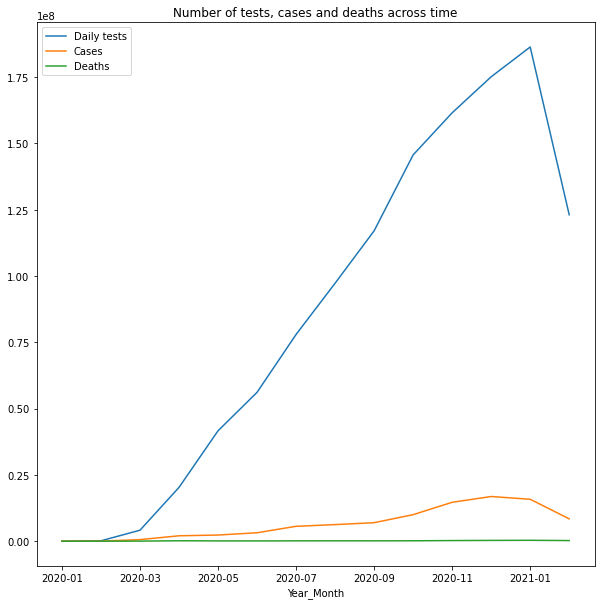

In [212]:
#Visualisation 1 - comparison across time
fig, ax = plt.subplots(figsize=(10, 10))
data_cases_grouped_bytime.plot.line(ax=ax)
ax.set_title('Number of tests, cases and deaths across time')

In [213]:
data_cases_grouped_byentity=data_cases.groupby(["Entity"])
data_cases_grouped_byentity=data_cases_grouped_byentity.agg({'Daily tests':'sum', 'Cases':'max', 'Deaths':'max'}).rename(columns={"Daily tests": "Total tests", "Cases": "Total cases", "Deaths": "Total deaths"})
data_cases_grouped_byentity=data_cases_grouped_byentity.sort_values("Total cases",ascending=False)

data_cases_grouped_byentity

,Total tests,Total cases,Total deaths
Entity,,,
United States,328405054.0,28605669.0,513091.0
India,204644073.0,11112241.0,157157.0
Russia,103171283.0,4198400.0,84700.0
United Kingdom,83348027.0,4188827.0,123083.0
France,51520729.0,3747263.0,85741.0
...,...,...,...
Mongolia,1609563.0,2952.0,2.0
Vietnam,333691.0,2448.0,35.0
New Zealand,1469444.0,2378.0,26.0


In [214]:
data_total_stats=data_cases_grouped_byentity.reset_index(level=['Entity'])
data_total_stats

,Entity,Total tests,Total cases,Total deaths
0,United States,328405054.0,28605669.0,513091.0
1,India,204644073.0,11112241.0,157157.0
2,Russia,103171283.0,4198400.0,84700.0
3,United Kingdom,83348027.0,4188827.0,123083.0
4,France,51520729.0,3747263.0,85741.0
...,...,...,...,...
99,Mongolia,1609563.0,2952.0,2.0
100,Vietnam,333691.0,2448.0,35.0
101,New Zealand,1469444.0,2378.0,26.0
102,Bhutan,508007.0,867.0,1.0


In [215]:
#combine 2 df
data_combined=data_countries.merge(data_total_stats,on=['Entity'])
data_combined

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total tests,Total cases,Total deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,432998.0,107167.0,1796.0
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,3100.0,113092.0,2983.0
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,6094735.0,2107365.0,51965.0
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,99658.0,172058.0,3192.0
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,9336541.0,28978.0,909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,328405054.0,28605669.0,513091.0
100,Uruguay,South America,-32.52,-55.77,16,2.80,3.74,16190.1,3456750,35,15,804508.0,57994.0,608.0
101,Vietnam,Asia,14.06,108.28,25,2.60,0.82,2715.3,95540800,32,7,333691.0,2448.0,35.0
102,Zambia,Africa,-13.13,27.85,21,2.00,0.09,1305.1,17094130,17,2,1044305.0,78534.0,1091.0


In [216]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           104 non-null    object 
 1   Continent                        104 non-null    object 
 2   Latitude                         104 non-null    float64
 3   Longitude                        104 non-null    float64
 4   Average temperature per year     104 non-null    int64  
 5   Hospital beds per 1000 people    104 non-null    float64
 6   Medical doctors per 1000 people  104 non-null    float64
 7   GDP/Capita                       104 non-null    float64
 8   Population                       104 non-null    int64  
 9   Median age                       104 non-null    int64  
 10  Population aged 65 and over (%)  104 non-null    int64  
 11  Total tests                      104 non-null    float64
 12  Total cases           

In [217]:
#take into account effect of population size on number of cases and deaths
data_combined["Total cases (% of population)"]=(data_combined["Total cases"]/data_combined["Population"])*100
data_combined["Total deaths (% of population)"]=(data_combined["Total deaths"]/data_combined["Population"])*100
data_combined=data_combined.drop(columns=["Total cases","Total deaths"]).sort_values("Total cases (% of population)",ascending=False)
data_combined

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Total tests,Total cases (% of population),Total deaths (% of population)
84,Slovenia,Europe,46.15,15.00,11,4.50,2.82,25946.2,2066748,44,20,1691953.0,9.197106,0.185606
52,Luxembourg,Europe,49.82,6.13,9,4.51,2.92,114704.6,599449,39,14,2091454.0,9.193443,0.106264
41,Israel,Asia,31.05,34.85,21,2.99,3.58,43592.1,8712400,30,12,12853090.0,8.904630,0.066021
99,United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,328405054.0,8.782310,0.157526
70,Panama,North America,8.54,-80.78,27,2.30,1.59,15731.0,4098587,29,8,1881379.0,8.317867,0.142610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Madagascar,Africa,-18.77,46.87,22,0.20,0.14,523.4,25570895,19,3,28934.0,0.077553,0.001161
65,New Zealand,Oceania,-40.90,174.89,11,2.61,3.06,42084.4,4793900,37,16,1469444.0,0.049605,0.000542
90,Thailand,Asia,15.87,100.99,27,2.10,0.47,7806.7,69037513,40,12,2681565.0,0.037706,0.000120
28,Fiji,Oceania,-16.58,179.41,25,2.30,0.84,6175.9,905502,28,5,23998.0,0.006516,0.000221


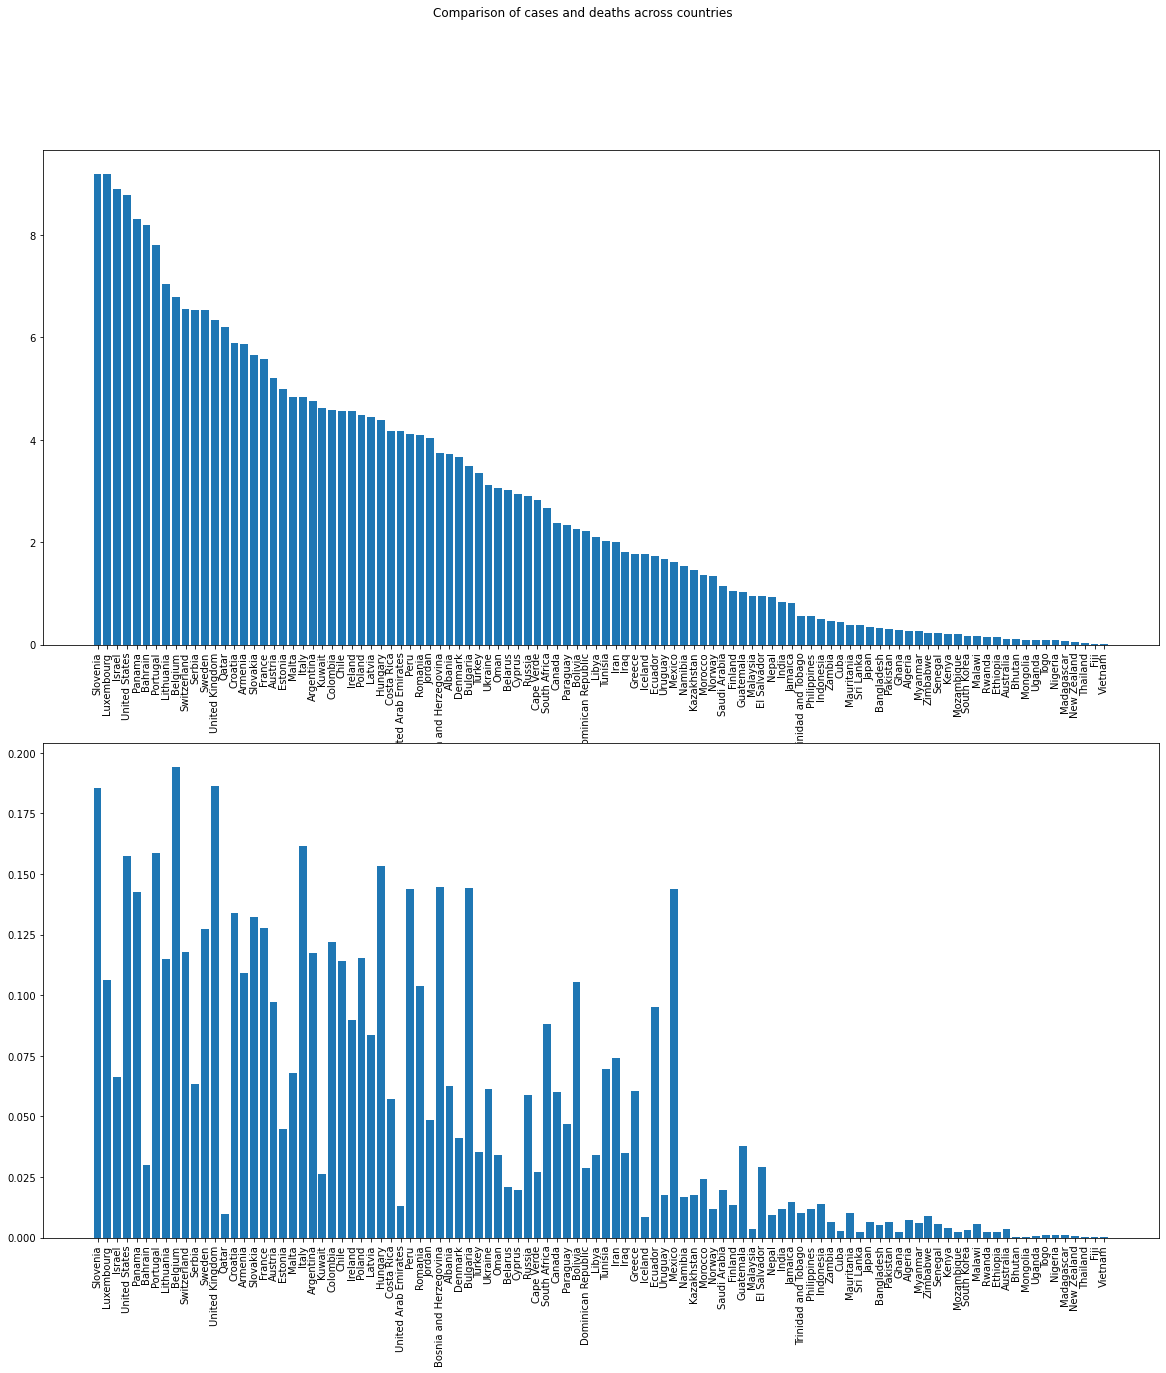

In [218]:
#Visualisation 2 - comparison across countries
fig, axs = plt.subplots(2,figsize=(20, 20))
fig.suptitle('Comparison of cases and deaths across countries')
axs[0].bar(data_combined['Entity'],data_combined['Total cases (% of population)'])
axs[1].bar(data_combined['Entity'],data_combined['Total deaths (% of population)'])
axs[0].tick_params(axis='x', labelrotation = 90)
axs[1].tick_params(axis='x', labelrotation = 90)
plt.show()

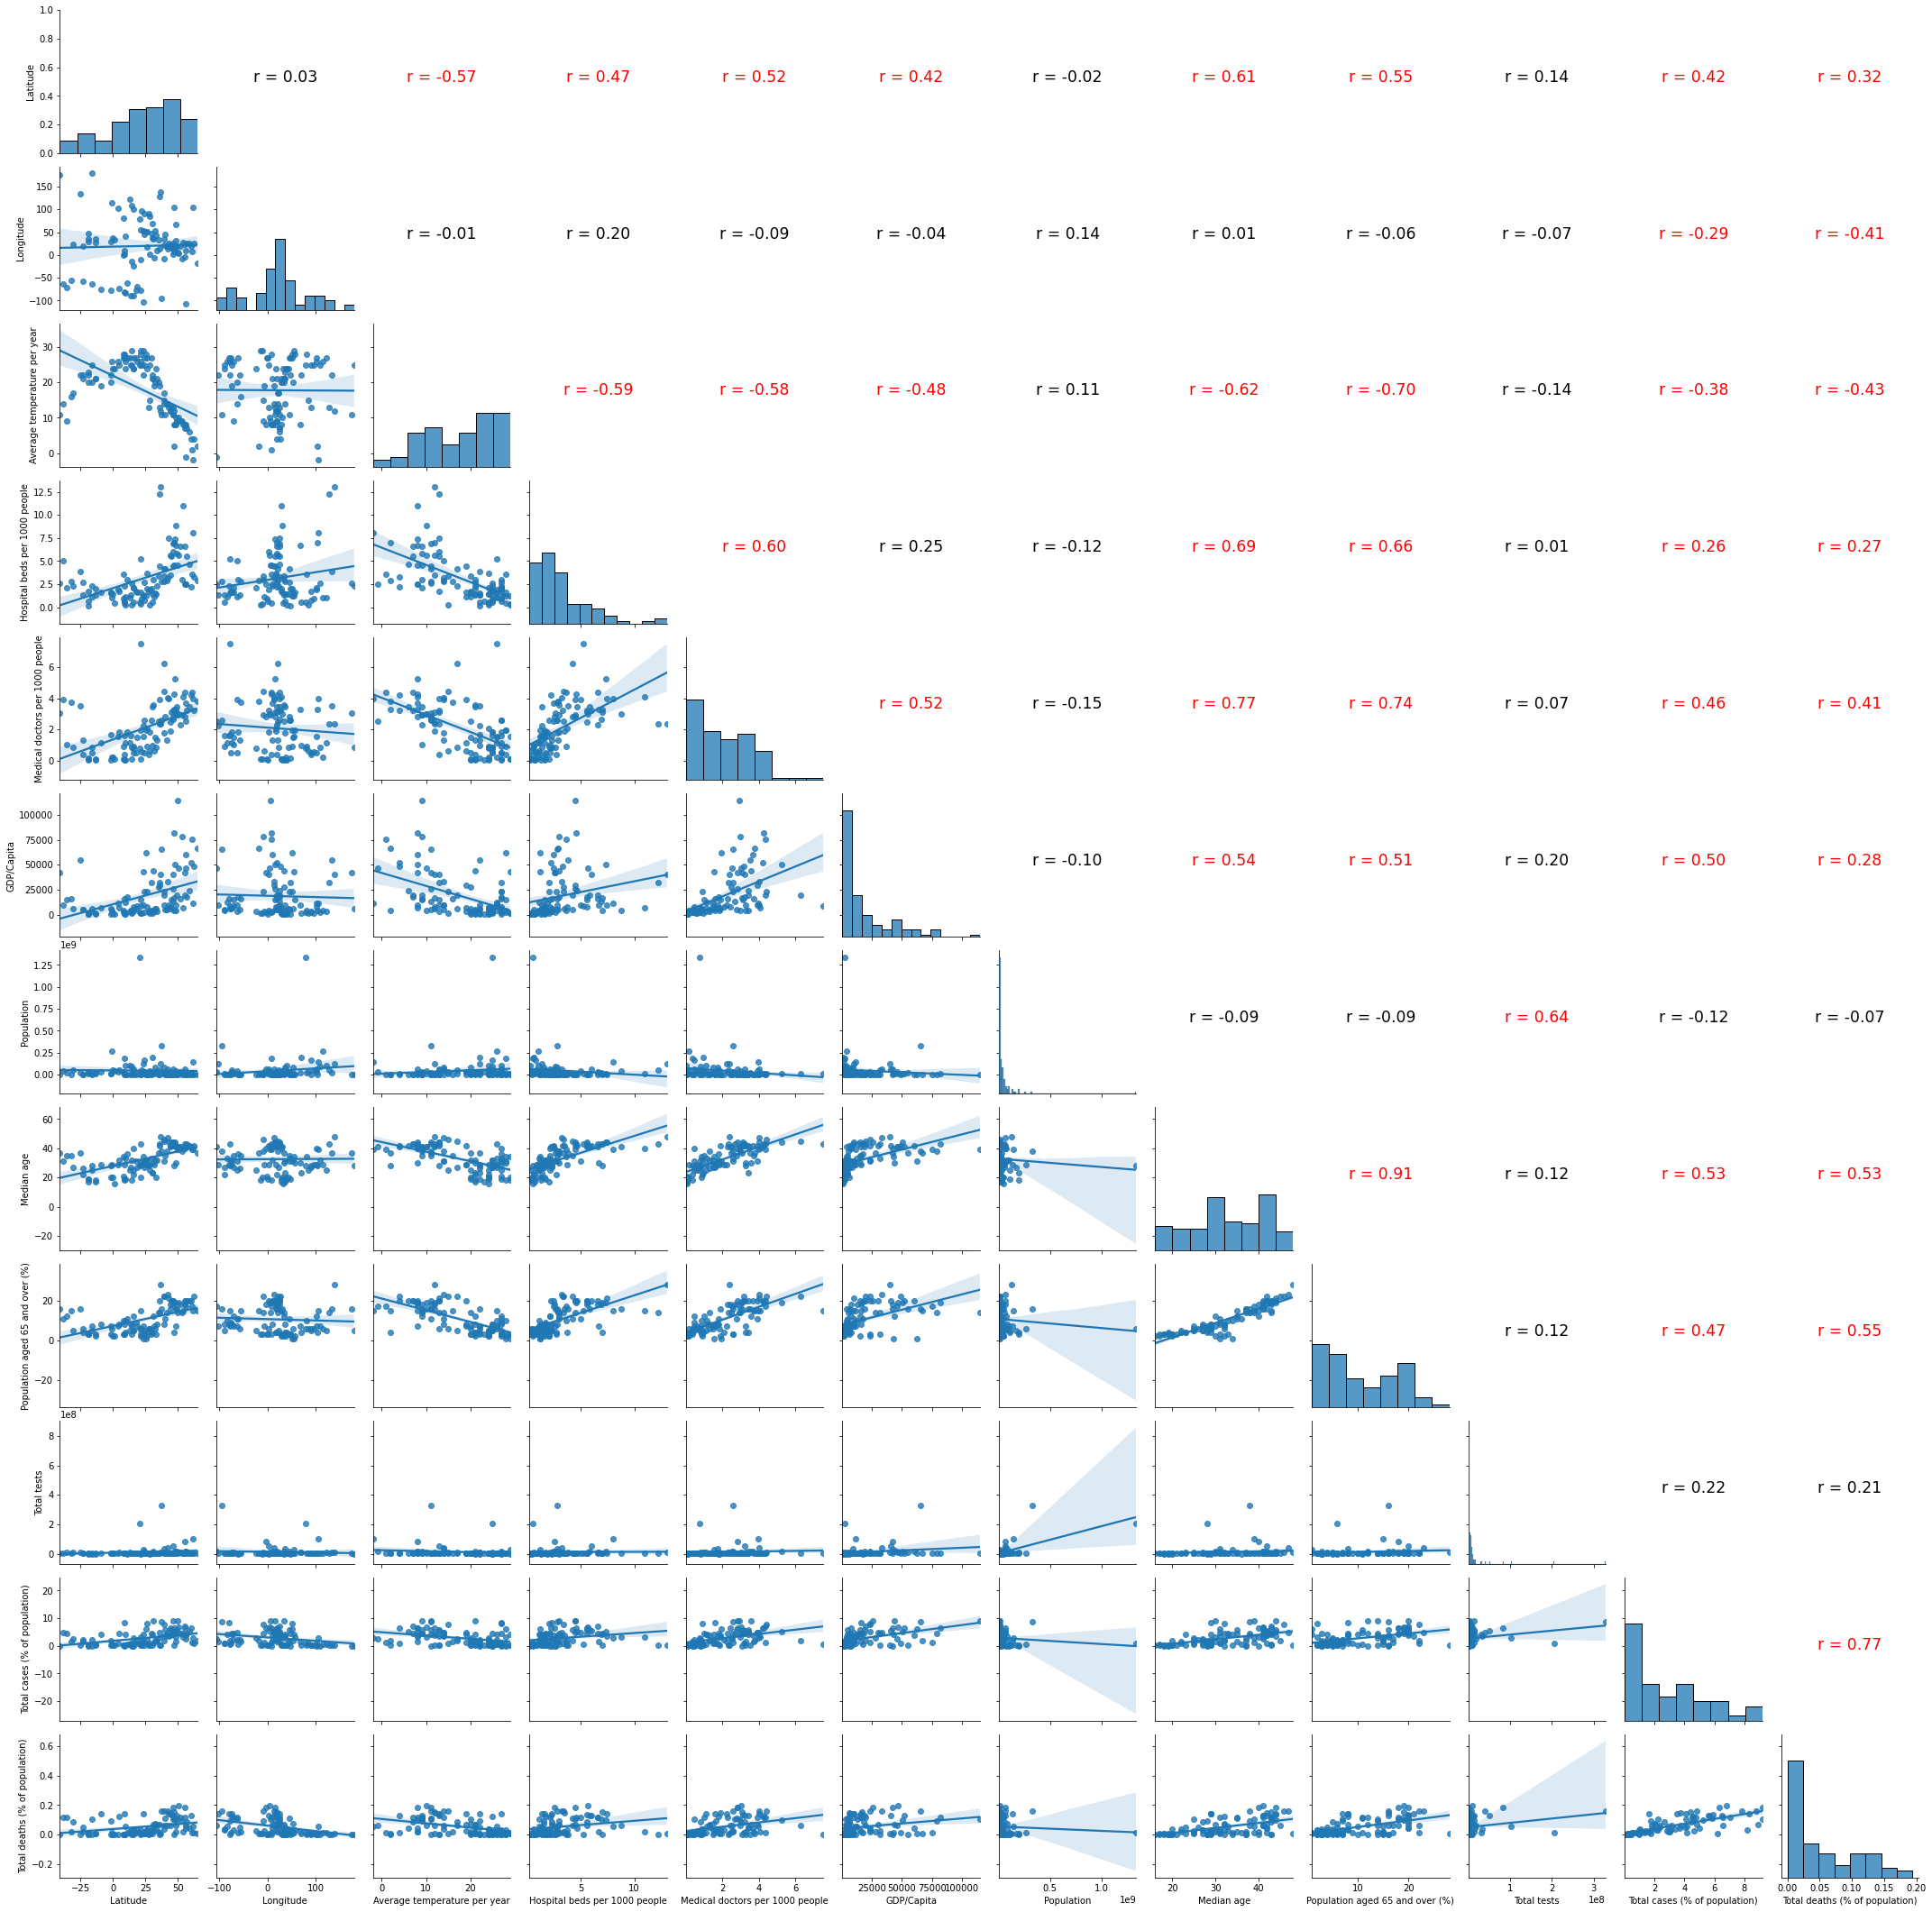

In [219]:
#Visualisation 3 - effect of factors on cases and deaths
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    if abs(r)>0.25:
        ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center',fontsize='xx-large',color='red')
    else:
        ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center',fontsize='xx-large')
    ax.set_axis_off()

g = sns.PairGrid(data_combined)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)